## EXPLORATORY DATA ANALYSIS

In [ ]:
ls

In [1]:
import requests as reqs 
import copy
import json
import os
import pandas as pd
import numpy as np
import glob

import os
import re

import seaborn as sns

%matplotlib inline
import matplotlib.pyplot as plt
import plotly.express as px
import matplotlib.ticker as mtick

import datetime
from datetime import timedelta
from pandas.api.types import is_datetime64_any_dtype as is_datetime
from scipy.stats import percentileofscore

from sklearn.cluster import KMeans
from sklearn import datasets

from scipy.spatial.distance import cdist, euclidean
from scipy.stats import percentileofscore



### Set paths

In [2]:
data = 'data/raw/2019'
data_clean = 'data/clean'
parent = '/Users/ilonanietosvaara/Documents/Kurssit/spiced/spiced_projects/scikit-cilantro-student-code/final_project'
datapath = os.path.join(parent, data)
datapath_clean = os.path.join(parent, data_clean)

## Set style

In [3]:
sns.set_style("whitegrid")


In [4]:
df = pd.read_csv(f'{datapath_clean}/EDA_data.csv')

In [5]:
df = df.dropna(subset=['team'])

NumExpr defaulting to 4 threads.


In [6]:
df.to_csv(f'{datapath_clean}/EDA_data.csv')
df.to_csv(f'{parent}/streamlit/data/EDA_data.csv')

In [7]:
df.team.unique().tolist()

['sanfranciscoflamethrowers',
 'vancouverriptide',
 'torontorush',
 'dcbreeze',
 'raleighflyers',
 'detroitmechanix',
 'indianapolisalleycats',
 'pittsburghthunderbirds',
 'seattlecascades',
 'losangelesaviators',
 'cincinnatirevolution',
 'philadelphiaphoenix',
 'montrealroyal',
 'newyorkempire',
 'charlotteexpress',
 'sanjosespiders',
 'sandiegogrowlers',
 'jacksonvillecannons',
 'nashvillenightwatch',
 'madisonradicals',
 'ottawaoutlaws',
 'minnesotawindchill',
 'chicagowildfire',
 'rochesterdragons',
 'sfflamethrowers',
 'dallasroughnecks',
 'atlantahustle',
 'austinsol',
 'tampabaycannons']

### Read data

In [8]:
df = pd.read_csv(f'{datapath_clean}/EDA_data.csv')
df_point = pd.read_csv(f'{datapath_clean}/reduced_size_clean.csv', index_col=None)

FileNotFoundError: [Errno 2] No such file or directory: '/Users/ilonanietosvaara/Documents/Kurssit/spiced/spiced_projects/scikit-cilantro-student-code/final_project/data/clean/reduced_size_clean.csv'

In [43]:
df_point

,datetime,tournamemnt,opponent,point_elapsed_seconds,line,our_score_end_of_point,their_score_end_of_point,event_type,action,passer,...,hang_time_secs,elapsed_time_secs,team,game_id_str,opponent_clean,season,game_id,team_id,opponent_id,date_id
0,2019-07-04,AUDL,ottawaoutlaws,30,D,1,0,Defense,Pull,NaN,...,NaN,0.0,montrealroyal,2019-07-04 19:12_MontrealRoyal2019-stats.csv,ottawaoutlaws,2019,1512,13,16,226
1,2019-07-04,AUDL,ottawaoutlaws,30,D,1,0,Defense,OpponentCatch,NaN,...,NaN,4.0,montrealroyal,2019-07-04 19:12_MontrealRoyal2019-stats.csv,ottawaoutlaws,2019,1512,13,16,226
2,2019-07-04,AUDL,ottawaoutlaws,30,D,1,0,Defense,OpponentCatch,NaN,...,NaN,8.0,montrealroyal,2019-07-04 19:12_MontrealRoyal2019-stats.csv,ottawaoutlaws,2019,1512,13,16,226
3,2019-07-04,AUDL,ottawaoutlaws,30,D,1,0,Defense,Throwaway,NaN,...,NaN,12.0,montrealroyal,2019-07-04 19:12_MontrealRoyal2019-stats.csv,ottawaoutlaws,2019,1512,13,16,226
4,2019-07-04,AUDL,ottawaoutlaws,30,D,1,0,Offense,Catch,Lemieux,...,NaN,20.0,montrealroyal,2019-07-04 19:12_MontrealRoyal2019-stats.csv,ottawaoutlaws,2019,1512,13,16,226
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
554300,2015-05-09,AUDL,totontorush,27,O,25,28,Offense,Catch,Skware K,...,NaN,8195.0,newyorkempire,2015-05-09 19:03_NewYorkEmpire2015-stats.csv,torontorush,2015,100,15,27,13
554301,2015-05-09,AUDL,totontorush,27,O,25,28,Offense,Catch,Aulett M,...,NaN,8202.0,newyorkempire,2015-05-09 19:03_NewYorkEmpire2015-stats.csv,torontorush,2015,100,15,27,13
554302,2015-05-09,AUDL,totontorush,27,O,25,28,Offense,Goal,Marsh J,...,NaN,8211.0,newyorkempire,2015-05-09 19:03_NewYorkEmpire2015-stats.csv,torontorush,2015,100,15,27,13
554303,2015-05-09,AUDL,totontorush,19,D,25,28,Defense,Pull,NaN,...,7.805,8273.0,newyorkempire,2015-05-09 19:03_NewYorkEmpire2015-stats.csv,torontorush,2015,100,15,27,13


In [6]:
df

,act_player_id,catch,drop,goalcatch,callahan,d,pull,callahan_throw,throw,dropped_throw,...,tournamemnt,game_id_str,season,date_id,act_player,throws_all,turnover,pass_perc,catch_perc,ranking2019
0,chatte_s_0,16.0,0.0,2.0,0.0,1.0,0.0,0.0,12.0,0.0,...,AUDL West 2015,2015-04-11 18:21_SanFranciscoFlameThrowers2015-stats.csv,2015.0,0.0,chatte_s,16.0,1.0,0.937500,1.0,0
1,chialv_f_0,27.0,0.0,0.0,0.0,1.0,2.0,0.0,45.0,0.0,...,AUDL West 2015,2015-04-11 18:21_SanFranciscoFlameThrowers2015-stats.csv,2015.0,0.0,chialv_f,50.0,3.0,0.940000,1.0,0
2,dallma_l_0,18.0,0.0,4.0,0.0,1.0,0.0,0.0,12.0,0.0,...,AUDL West 2015,2015-04-11 18:21_SanFranciscoFlameThrowers2015-stats.csv,2015.0,0.0,dallma_l,17.0,4.0,0.764706,1.0,0
3,fein_b_0,5.0,0.0,0.0,0.0,1.0,0.0,0.0,5.0,0.0,...,AUDL West 2015,2015-04-11 18:21_SanFranciscoFlameThrowers2015-stats.csv,2015.0,0.0,fein_b,5.0,0.0,1.000000,1.0,0
4,ikeda_c_0,10.0,0.0,0.0,NaN,NaN,NaN,0.0,11.0,1.0,...,AUDL West 2015,2015-04-11 18:21_SanFranciscoFlameThrowers2015-stats.csv,2015.0,0.0,ikeda_c,13.0,0.0,1.000000,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29614,perivier_1503,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0,0.0,...,NaN,2019-06-29 21:29_AtlantaHustle2019-stats.csv,2019.0,224.0,perivier,1.0,0.0,1.000000,NaN,11
29615,brodbeck_1507,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0,0.0,...,NaN,2019-06-30 13:09_AustinSol2019-stats.csv,2019.0,225.0,brodbeck,1.0,0.0,1.000000,NaN,18
29616,mika_c_1507,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0,0.0,...,NaN,2019-06-30 13:09_AustinSol2019-stats.csv,2019.0,225.0,mika_c,1.0,0.0,1.000000,NaN,18
29617,wolfe_j_1507,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,...,NaN,2019-06-30 13:09_AustinSol2019-stats.csv,2019.0,225.0,wolfe_j,1.0,1.0,0.000000,NaN,18


In [7]:
goals = df_point[df_point["action"] == "Goal"]

In [8]:
goals

,datetime,tournamemnt,opponent,point_elapsed_seconds,line,our_score_end_of_point,their_score_end_of_point,event_type,action,passer,...,hang_time_secs,elapsed_time_secs,team,game_id_str,opponent_clean,season,game_id,team_id,opponent_id,date_id
6,2019-07-04,AUDL,ottawaoutlaws,30,D,1,0,Offense,Goal,Groulx,...,NaN,28.0,montrealroyal,2019-07-04 19:12_MontrealRoyal2019-stats.csv,ottawaoutlaws,2019,1512,13,16,226
11,2019-07-04,AUDL,ottawaoutlaws,18,D,1,1,Defense,Goal,NaN,...,NaN,99.0,montrealroyal,2019-07-04 19:12_MontrealRoyal2019-stats.csv,ottawaoutlaws,2019,1512,13,16,226
17,2019-07-04,AUDL,ottawaoutlaws,27,O,2,1,Offense,Goal,Sokolsky,...,NaN,135.0,montrealroyal,2019-07-04 19:12_MontrealRoyal2019-stats.csv,ottawaoutlaws,2019,1512,13,16,226
29,2019-07-04,AUDL,ottawaoutlaws,237,D,3,1,Offense,Goal,Goderre,...,NaN,429.0,montrealroyal,2019-07-04 19:12_MontrealRoyal2019-stats.csv,ottawaoutlaws,2019,1512,13,16,226
40,2019-07-04,AUDL,ottawaoutlaws,41,D,3,2,Defense,Goal,NaN,...,NaN,534.0,montrealroyal,2019-07-04 19:12_MontrealRoyal2019-stats.csv,ottawaoutlaws,2019,1512,13,16,226
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
554288,2015-05-09,AUDL,totontorush,123,O,22,27,Defense,Goal,NaN,...,NaN,7838.0,newyorkempire,2015-05-09 19:03_NewYorkEmpire2015-stats.csv,torontorush,2015,100,15,27,13
554293,2015-05-09,AUDL,totontorush,30,O,23,27,Offense,Goal,Aulett M,...,NaN,7916.0,newyorkempire,2015-05-09 19:03_NewYorkEmpire2015-stats.csv,torontorush,2015,100,15,27,13
554296,2015-05-09,AUDL,totontorush,42,D,24,27,Offense,Goal,LeMar M,...,NaN,8013.0,newyorkempire,2015-05-09 19:03_NewYorkEmpire2015-stats.csv,torontorush,2015,100,15,27,13
554298,2015-05-09,AUDL,totontorush,63,D,24,28,Defense,Goal,NaN,...,NaN,8133.0,newyorkempire,2015-05-09 19:03_NewYorkEmpire2015-stats.csv,torontorush,2015,100,15,27,13


## Time per point 

How long did the teams take to make a point? (long points vs quick wins)

In [9]:
goals.columns

Index(['datetime', 'tournamemnt', 'opponent', 'point_elapsed_seconds', 'line',
       'our_score_end_of_point', 'their_score_end_of_point', 'event_type',
       'action', 'passer', 'receiver', 'defender', 'hang_time_secs',
       'elapsed_time_secs', 'team', 'game_id_str', 'opponent_clean', 'season',
       'game_id', 'team_id', 'opponent_id', 'date_id'],
      dtype='object')

In [20]:
goals.season

6         2019
11        2019
17        2019
29        2019
40        2019
          ... 
554288    2015
554293    2015
554296    2015
554298    2015
554302    2015
Name: season, Length: 70009, dtype: int64

In [22]:
goals.loc[goals.season==2019]

,datetime,tournamemnt,opponent,point_elapsed_seconds,line,our_score_end_of_point,their_score_end_of_point,event_type,action,passer,...,hang_time_secs,elapsed_time_secs,team,game_id_str,opponent_clean,season,game_id,team_id,opponent_id,date_id
6,2019-07-04,AUDL,ottawaoutlaws,30,D,1,0,Offense,Goal,Groulx,...,NaN,28.0,montrealroyal,2019-07-04 19:12_MontrealRoyal2019-stats.csv,ottawaoutlaws,2019,1512,13,16,226
11,2019-07-04,AUDL,ottawaoutlaws,18,D,1,1,Defense,Goal,NaN,...,NaN,99.0,montrealroyal,2019-07-04 19:12_MontrealRoyal2019-stats.csv,ottawaoutlaws,2019,1512,13,16,226
17,2019-07-04,AUDL,ottawaoutlaws,27,O,2,1,Offense,Goal,Sokolsky,...,NaN,135.0,montrealroyal,2019-07-04 19:12_MontrealRoyal2019-stats.csv,ottawaoutlaws,2019,1512,13,16,226
29,2019-07-04,AUDL,ottawaoutlaws,237,D,3,1,Offense,Goal,Goderre,...,NaN,429.0,montrealroyal,2019-07-04 19:12_MontrealRoyal2019-stats.csv,ottawaoutlaws,2019,1512,13,16,226
40,2019-07-04,AUDL,ottawaoutlaws,41,D,3,2,Defense,Goal,NaN,...,NaN,534.0,montrealroyal,2019-07-04 19:12_MontrealRoyal2019-stats.csv,ottawaoutlaws,2019,1512,13,16,226
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438821,2019-11-24,AUDL,seattlecascades,47,O,31,25,Offense,Goal,Muffin,...,NaN,8749.0,dallasroughnecks,2019-11-24 14:46_DallasRoughnecks2016-stats.csv,seattlecascades,2019,1551,5,24,237
438823,2019-11-24,AUDL,seattlecascades,6,D,31,26,Defense,Goal,NaN,...,NaN,8841.0,dallasroughnecks,2019-11-24 14:46_DallasRoughnecks2016-stats.csv,seattlecascades,2019,1551,5,24,237
438836,2019-11-24,AUDL,seattlecascades,127,O,32,26,Offense,Goal,Muffin,...,NaN,8965.0,dallasroughnecks,2019-11-24 14:46_DallasRoughnecks2016-stats.csv,seattlecascades,2019,1551,5,24,237
438843,2019-11-24,AUDL,seattlecascades,142,D,33,26,Offense,Goal,Matt B,...,NaN,9109.0,dallasroughnecks,2019-11-24 14:46_DallasRoughnecks2016-stats.csv,seattlecascades,2019,1551,5,24,237


In [100]:
goals = goals.loc[goals.season==2019]

In [24]:
point_combined = goals['point_elapsed_seconds'].values

Text(0, 0.5, 'Count of Number of Points')

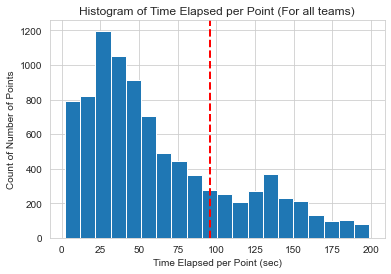

In [25]:
plt.hist(point_combined[point_combined <200],bins=20)
plt.title('Histogram of Time Elapsed per Point (For all teams)')
plt.axvline(point_combined.mean(), color='r', linestyle='dashed', linewidth=2)
plt.xlabel('Time Elapsed per Point (sec)')
plt.ylabel('Count of Number of Points')

In [41]:
goals

,Date/Time,Tournamemnt,Opponent,Point Elapsed Seconds,Line,Our Score - End of Point,Their Score - End of Point,Event Type,Action,Passer,...,Begin Y,End Area,End X,End Y,Distance Unit of Measure,Absolute Distance,Lateral Distance,Toward Our Goal Distance,team,Unnamed: 0
15,2019-04-20 18:52,AUDL,Indianapolis AlleyCats,59,O,0,2,Defense,Goal,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DetroitMechanix2019-stats.csv,NaN
25,2019-04-20 18:52,AUDL,Indianapolis AlleyCats,139,O,1,2,Offense,Goal,Cubitt,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DetroitMechanix2019-stats.csv,NaN
27,2019-04-20 18:52,AUDL,Indianapolis AlleyCats,6,D,1,3,Defense,Goal,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DetroitMechanix2019-stats.csv,NaN
35,2019-04-20 18:52,AUDL,Indianapolis AlleyCats,35,O,2,3,Offense,Goal,Cubitt,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DetroitMechanix2019-stats.csv,NaN
37,2019-04-20 18:52,AUDL,Indianapolis AlleyCats,6,D,2,4,Defense,Goal,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DetroitMechanix2019-stats.csv,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3802,2019-06-22 18:05,AUDL,Chicago Wildfire,138,D,9,22,Defense,Goal,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DetroitMechanix2019-stats.csv,NaN
3803,2019-06-22 18:05,AUDL,Chicago Wildfire,7,O,10,22,Offense,Goal,Cubitt,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DetroitMechanix2019-stats.csv,NaN
3809,2019-06-22 18:05,AUDL,Chicago Wildfire,22,D,10,23,Defense,Goal,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DetroitMechanix2019-stats.csv,NaN
3812,2019-06-22 18:05,AUDL,Chicago Wildfire,15,O,11,23,Offense,Goal,Dex,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DetroitMechanix2019-stats.csv,NaN


Text(0, 0.5, 'Count of Number of Points')

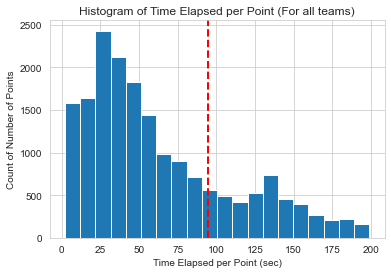

In [101]:
plt.hist(point_combined[point_combined <200],bins=20)
plt.title('Histogram of Time Elapsed per Point (For all teams)')
plt.axvline(point_combined.mean(), color='r', linestyle='dashed', linewidth=2)
plt.xlabel('Time Elapsed per Point (sec)')
plt.ylabel('Count of Number of Points')

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

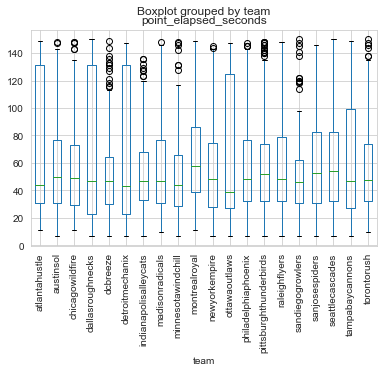

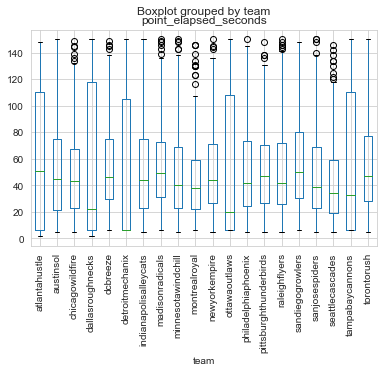

In [26]:
filtered = goals[goals['point_elapsed_seconds']<=150]
filteredo = filtered[filtered['line'] == 'O']
filteredd = filtered[filtered['line'] == 'D']

filteredo.boxplot('point_elapsed_seconds', 'team')
locs, labels = plt.xticks()
plt.setp(labels, rotation=90)

filteredd.boxplot('point_elapsed_seconds', 'team')
locs, labels = plt.xticks()
plt.setp(labels, rotation=90)

In [102]:
# break_array are the percentage of points broken starting on defense
# broken_array are the percentage of points broken starting on offense
teams = np.unique(goals['team'])
break_array = []
broken_array = []
for teamname in teams[1:19]:
    team = goals[goals['team'] == teamname]
    o_line = team[team["line"] == "O"]
    broken = o_line["event_type"][o_line["event_type"] == "Defense"]
    d_line = team[team["line"] == "D"]
    breaks = d_line["event_type"][d_line["event_type"] == "Offense"]
    broken_array.append(broken.shape[0] / float(o_line.shape[0]))
    break_array.append(breaks.shape[0] / float(d_line.shape[0]))

#creating a dictionary with team names and break percentages
break_dict = dict(zip(teams[1:19],break_array))
broken_dict = dict(zip(teams[1:19],broken_array))

In [103]:
broken_dict

{'austinsol': 0.332,
 'chicagowildfire': 0.2751937984496124,
 'dallasroughnecks': 0.26595744680851063,
 'dcbreeze': 0.21804511278195488,
 'detroitmechanix': 0.46096654275092935,
 'indianapolisalleycats': 0.2235294117647059,
 'madisonradicals': 0.26976744186046514,
 'minnesotawindchill': 0.2559055118110236,
 'montrealroyal': 0.2581967213114754,
 'newyorkempire': 0.2015810276679842,
 'ottawaoutlaws': 0.33079847908745247,
 'philadelphiaphoenix': 0.29583333333333334,
 'pittsburghthunderbirds': 0.2454212454212454,
 'raleighflyers': 0.2265625,
 'sandiegogrowlers': 0.20994475138121546,
 'sanjosespiders': 0.31413612565445026,
 'seattlecascades': 0.26903553299492383,
 'tampabaycannons': 0.34962406015037595}

In [104]:
break_dict

{'austinsol': 0.26609442060085836,
 'chicagowildfire': 0.3111111111111111,
 'dallasroughnecks': 0.32247557003257327,
 'dcbreeze': 0.26181818181818184,
 'detroitmechanix': 0.16111111111111112,
 'indianapolisalleycats': 0.25287356321839083,
 'madisonradicals': 0.3611111111111111,
 'minnesotawindchill': 0.277992277992278,
 'montrealroyal': 0.2336065573770492,
 'newyorkempire': 0.31448763250883394,
 'ottawaoutlaws': 0.22026431718061673,
 'philadelphiaphoenix': 0.22943722943722944,
 'pittsburghthunderbirds': 0.310580204778157,
 'raleighflyers': 0.3253424657534247,
 'sandiegogrowlers': 0.3005181347150259,
 'sanjosespiders': 0.26595744680851063,
 'seattlecascades': 0.2275132275132275,
 'tampabaycannons': 0.25877192982456143}

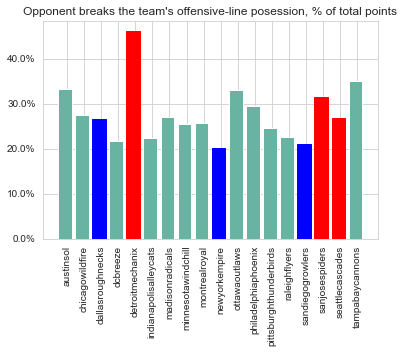

In [129]:
# break_array are the percentage of points broken starting on defense
# broken_array are the percentage of points broken starting on offense
%matplotlib inline
h = plt.bar(range(len(teams[1:19])), broken_dict.values(), color="#69b3a2")
xticks_pos = [0.65*patch.get_width() + patch.get_xy()[0] for patch in h]
plt.xticks(xticks_pos,teams[1:19])

plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0))

locs, labels = plt.xticks()
plt.setp(labels, rotation=90)

#denote regional winners San Jose Spiders, Toronto Rush, Madison Radicals, and Raleigh Flyers
h[4].set_color('r')
h[16].set_color('r')
h[15].set_color('r')

h[2].set_color('b')
h[9].set_color('b')
h[14].set_color('b')
#h.yaxis.set_major_formatter(mtick.PercentFormatter())
plt.title("Opponent breaks the team's offensive-line posession, % of total points")
plt.savefig(f'{parent}/broken_D', dpi=300, bbox_inches='tight')



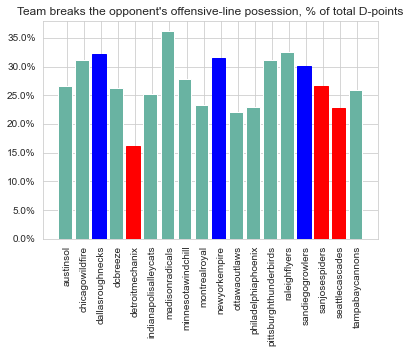

In [131]:
# break_array are the percentage of points broken starting on defense
# broken_array are the percentage of points broken starting on offense
h = plt.bar(range(len(teams[1:19])), break_dict.values(), color="#69b3a2")
xticks_pos = [0.65*patch.get_width() + patch.get_xy()[0] for patch in h]
plt.xticks(xticks_pos,teams[1:19])
locs, labels = plt.xticks()
plt.setp(labels, rotation=90)

plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0))

#denote regional winners 
h[4].set_color('r')
h[15].set_color('r')
h[16].set_color('r')

h[2].set_color('b')
h[9].set_color('b')
h[14].set_color('b')
plt.title("Team breaks the opponent's offensive-line posession, % of total D-points")
plt.savefig(f'{parent}/break_D', dpi=300, bbox_inches='tight')

### --> More important to hold on to your possession (not be broken) than to have great defence, and break 

https://afbcary.github.io/audl-stats/
* Offensive Efficiency = (Points Won on Offense) / (Points Played on Offense)
* Defensive Efficiency = (Points Won on Defense) / (Points Played on Defense

In [ ]:
(Predicted Offensive Efficiency) = 0.7055 * 10 -4 (Points Played on Offense) + 0.5630


In [ ]:
# Replies: how much should

* Regress each players offensive efficiency with the amount of points player on offence 

* Teams with large positive slopes for their offensive / defensive linear regressions would likely benefit from playing their stars even more frequently. Those with negative slopes might advance by giving less-known players additional touches.

https://ultiworld.com/2019/03/29/predicting-audls-breakout-stars-stats/

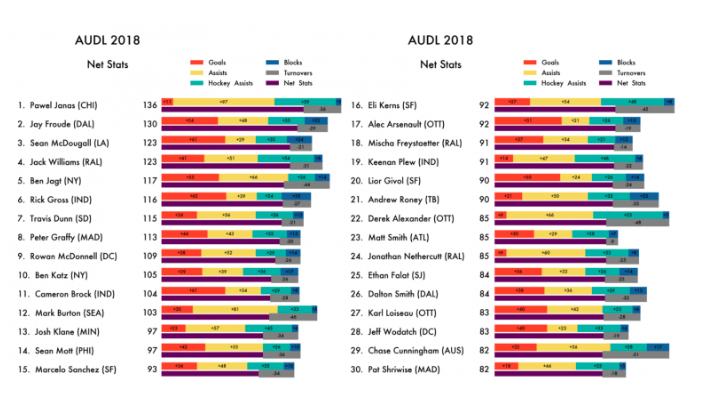

### Distribution of points played - Detroit Mechanix vs Newyork empire

In [3]:
os.chdir(datapath)

In [4]:
os.getcwd()

'/Users/ilonanietosvaara/Documents/Kurssit/spiced/spiced_projects/scikit-cilantro-student-code/final_project/data/raw/2019'

In [5]:
def read_csv(files):
    '''
    Read in all csv files to one dataframe, create column team with team name from file name
    
    input: csv files
    output: dataframe
    '''
    df = pd.DataFrame()
    tmp = pd.DataFrame()
    for i, f in enumerate(all_files):
   # for s in re.findall('([a-zA-Z ]*)\d*.*', f):
    #    team_name = s
     #   print(team_name)
        if i == 0:
            try: 
                df = pd.read_csv(f)
                df['team'] = f
                print(f)
            except:
                print(f'===error reading file===: {f}')
                pass
        else:
            try:
                tmp = pd.read_csv(f)
               # print(f)
                tmp['team'] = f
                df = df.append(tmp)
            except:
                print(f'===error reading file===: {f}')
                pass
    
    return df


In [6]:
# Place all csv files into list all_files
os.chdir(datapath)
all_files = glob.glob("*.csv")
df_2019 = read_csv(all_files)

DetroitMechanix2019-stats.csv


/Users/ilonanietosvaara/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3357: DtypeWarning: Columns (0,4,7,13,29,30,31,32,33,42,45,48) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


In [7]:
df_2019.columns

Index(['Date/Time', 'Tournamemnt', 'Opponent', 'Point Elapsed Seconds', 'Line',
       'Our Score - End of Point', 'Their Score - End of Point', 'Event Type',
       'Action', 'Passer', 'Receiver', 'Defender', 'Hang Time (secs)',
       'Player 0', 'Player 1', 'Player 2', 'Player 3', 'Player 4', 'Player 5',
       'Player 6', 'Player 7', 'Player 8', 'Player 9', 'Player 10',
       'Player 11', 'Player 12', 'Player 13', 'Player 14', 'Player 15',
       'Player 16', 'Player 17', 'Player 18', 'Player 19', 'Player 20',
       'Player 21', 'Player 22', 'Player 23', 'Player 24', 'Player 25',
       'Player 26', 'Player 27', 'Elapsed Time (secs)', 'Begin Area',
       'Begin X', 'Begin Y', 'End Area', 'End X', 'End Y',
       'Distance Unit of Measure', 'Absolute Distance', 'Lateral Distance',
       'Toward Our Goal Distance', 'team', 'Unnamed: 0'],
      dtype='object')

In [8]:
df_2019.Line.unique()

array(['D', 'O', 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 0, '1', '2', '3', '4', '5',
       '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17',
       '18', '19', '20', '21', '22', '23', '24', '25', '0'], dtype=object)

In [9]:
df_2019.shape

(167682, 54)

In [10]:
df_2019.drop((df_2019.Line!='O') | (df_2019.Line!='D').index, inplace=True)

In [29]:
df_2019.loc[(df_2019['Point Elapsed Seconds']=='O') | (df_2019['Point Elapsed Seconds']=='D')].shape

(11378, 54)

In [30]:
df_2019.drop(df_2019[(df_2019['Point Elapsed Seconds']=='O') | (df_2019['Point Elapsed Seconds']=='D')].index, inplace=True)

In [32]:
df_2019.to_csv('combined.csv')

In [31]:
df_2019.shape

(156264, 54)

In [14]:
df_2019['Our Score - End of Point'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33])

In [15]:
df_2019.shape

(167642, 54)

In [16]:
mech = df_2019.loc[(df_2019.team=='DetroitMechanix2019-stats.csv')]

In [17]:
mech

,Date/Time,Tournamemnt,Opponent,Point Elapsed Seconds,Line,Our Score - End of Point,Their Score - End of Point,Event Type,Action,Passer,...,Begin Y,End Area,End X,End Y,Distance Unit of Measure,Absolute Distance,Lateral Distance,Toward Our Goal Distance,team,Unnamed: 0
2,2019-04-20 18:52,AUDL,Indianapolis AlleyCats,59,O,0,2,Offense,Catch,Cubitt,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DetroitMechanix2019-stats.csv,NaN
3,2019-04-20 18:52,AUDL,Indianapolis AlleyCats,59,O,0,2,Offense,Catch,Innis,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DetroitMechanix2019-stats.csv,NaN
4,2019-04-20 18:52,AUDL,Indianapolis AlleyCats,59,O,0,2,Offense,Catch,Bert,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DetroitMechanix2019-stats.csv,NaN
5,2019-04-20 18:52,AUDL,Indianapolis AlleyCats,59,O,0,2,Offense,Catch,Cubitt,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DetroitMechanix2019-stats.csv,NaN
6,2019-04-20 18:52,AUDL,Indianapolis AlleyCats,59,O,0,2,Offense,Catch,Innis,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DetroitMechanix2019-stats.csv,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3824,2019-06-22 18:05,AUDL,Chicago Wildfire,279,O,11,24,Offense,Catch,Cubitt,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DetroitMechanix2019-stats.csv,NaN
3825,2019-06-22 18:05,AUDL,Chicago Wildfire,279,O,11,24,Offense,Catch,Justin,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DetroitMechanix2019-stats.csv,NaN
3826,2019-06-22 18:05,AUDL,Chicago Wildfire,279,O,11,24,Offense,Throwaway,Dex,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DetroitMechanix2019-stats.csv,NaN
3827,2019-06-22 18:05,AUDL,Chicago Wildfire,279,O,11,24,Cessation,GameOver,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DetroitMechanix2019-stats.csv,NaN


In [76]:
cleaned

,Date/Time,Tournamemnt,Opponent,Point Elapsed Seconds,Line,Our Score - End of Point,Their Score - End of Point,Event Type,Action,Passer,...,Begin X,Begin Y,End Area,End X,End Y,Distance Unit of Measure,Absolute Distance,Lateral Distance,Toward Our Goal Distance,team
2,2019-04-20 18:52,AUDL,Indianapolis AlleyCats,59,O,0,2,Offense,Catch,Cubitt,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DetroitMechanix2019-stats.csv
3,2019-04-20 18:52,AUDL,Indianapolis AlleyCats,59,O,0,2,Offense,Catch,Innis,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DetroitMechanix2019-stats.csv
4,2019-04-20 18:52,AUDL,Indianapolis AlleyCats,59,O,0,2,Offense,Catch,Bert,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DetroitMechanix2019-stats.csv
5,2019-04-20 18:52,AUDL,Indianapolis AlleyCats,59,O,0,2,Offense,Catch,Cubitt,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DetroitMechanix2019-stats.csv
6,2019-04-20 18:52,AUDL,Indianapolis AlleyCats,59,O,0,2,Offense,Catch,Innis,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DetroitMechanix2019-stats.csv
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3824,2019-06-22 18:05,AUDL,Chicago Wildfire,279,O,11,24,Offense,Catch,Cubitt,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DetroitMechanix2019-stats.csv
3825,2019-06-22 18:05,AUDL,Chicago Wildfire,279,O,11,24,Offense,Catch,Justin,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DetroitMechanix2019-stats.csv
3826,2019-06-22 18:05,AUDL,Chicago Wildfire,279,O,11,24,Offense,Throwaway,Dex,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DetroitMechanix2019-stats.csv
3827,2019-06-22 18:05,AUDL,Chicago Wildfire,279,O,11,24,Cessation,GameOver,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DetroitMechanix2019-stats.csv


In [18]:
cleaned = mech[pd.isnull(mech["Player 1"]) == False]
players = pd.unique(cleaned.loc[:, "Player 0":"Player 27"].values.ravel())
players = [player for player in players if str(player) != "nan"]
players

NumExpr defaulting to 4 threads.


['Kinde',
 'Rogers',
 'Mark',
 'Cubitt',
 'Bert',
 'Innis',
 'Shrew',
 'Mitch',
 'Karl',
 'Anthony',
 'Pip',
 'Jeff',
 'Jimmy',
 'Troy',
 'Wasdi',
 'Sass',
 'Justin',
 'Cheer',
 'Ashton',
 'Beau',
 'Riegel',
 'Dex',
 'Tyler',
 'Sam',
 'Nicholl',
 'Ducky',
 'Fox',
 'Osinski',
 'Postema',
 'Neil',
 'Gibson',
 'Tristan',
 'Viggiani',
 'Auman',
 'Cari',
 'Skunk']

In [19]:
# throws where a goal was scored
goals = mech[mech["Action"] == "Goal"]
scores = goals[goals["Event Type"] == "Offense"]
goals.head(3)

,Date/Time,Tournamemnt,Opponent,Point Elapsed Seconds,Line,Our Score - End of Point,Their Score - End of Point,Event Type,Action,Passer,...,Begin Y,End Area,End X,End Y,Distance Unit of Measure,Absolute Distance,Lateral Distance,Toward Our Goal Distance,team,Unnamed: 0
15,2019-04-20 18:52,AUDL,Indianapolis AlleyCats,59,O,0,2,Defense,Goal,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DetroitMechanix2019-stats.csv,NaN
25,2019-04-20 18:52,AUDL,Indianapolis AlleyCats,139,O,1,2,Offense,Goal,Cubitt,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DetroitMechanix2019-stats.csv,NaN
27,2019-04-20 18:52,AUDL,Indianapolis AlleyCats,6,D,1,3,Defense,Goal,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DetroitMechanix2019-stats.csv,NaN


In [33]:
combined = pd.read_csv('combined.csv')
goals_combined = combined[combined["Action"] == "Goal"]

/Users/ilonanietosvaara/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (30,31,32,33) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [35]:
combined.shape

(156264, 55)

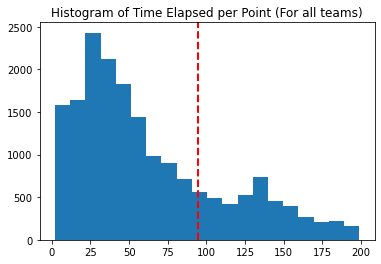

In [38]:
%matplotlib inline
#fig, axes = plt.subplots(nrows=1, ncols=2,sharex= False,sharey=False)
#ax = axes[0]
#ax1 = axes[1]
#35 seconds is the most common 
point_combined = goals_combined['Point Elapsed Seconds'].values

plt.hist(point_combined[point_combined <200],bins=20)
plt.title('Histogram of Time Elapsed per Point (For all teams)')
plt.axvline(point_combined.mean(), color='r', linestyle='dashed', linewidth=2)
#ax1.boxplot(point_combined[point_combined <200])

### Goals - Detroit

In [44]:
goals = df_point[df_point["action"] == "Goal"]

In [47]:
goals.team.unique()

array(['montrealroyal', 'sanjosespiders', 'madisonradicals',
       'detroitmechanix', 'sandiegogrowlers', 'dcbreeze', 'austinsol',
       'philadelphiaphoenix', 'tampabaycannons', 'indianapolisalleycats',
       'chicagowildfire', 'dallasroughnecks', 'pittsburghthunderbirds',
       'torontorush', 'newyorkempire', 'atlantahustle', 'seattlecascades',
       'minnesotawindchill', 'raleighflyers', 'ottawaoutlaws',
       'nashvillenightwatch', 'sanfranciscoflamethrowers',
       'jacksonvillecannons', 'vancouverriptide', 'cincinnatirevolution',
       'losangelesaviators', 'sfflamethrowers', 'charlotteexpress',
       'rochesterdragons'], dtype=object)

In [53]:
goals_mech = goals[goals.team == 'detroitmechanix']
goals_ny = goals[goals.team == 'newyorkempire']

In [49]:
goals_mech

,datetime,tournamemnt,opponent,point_elapsed_seconds,line,our_score_end_of_point,their_score_end_of_point,event_type,action,passer,...,hang_time_secs,elapsed_time_secs,team,game_id_str,opponent_clean,season,game_id,team_id,opponent_id,date_id
34990,2019-04-20,AUDL,indianapolisalleycats,6,D,0,1,Defense,Goal,NaN,...,NaN,4.0,detroitmechanix,2019-04-20 18:52_DetroitMechanix2019-stats.csv,indianapolisalleycats,2019,1338,7,8,200
35004,2019-04-20,AUDL,indianapolisalleycats,59,O,0,2,Defense,Goal,NaN,...,NaN,180.0,detroitmechanix,2019-04-20 18:52_DetroitMechanix2019-stats.csv,indianapolisalleycats,2019,1338,7,8,200
35014,2019-04-20,AUDL,indianapolisalleycats,139,O,1,2,Offense,Goal,Cubitt,...,NaN,388.0,detroitmechanix,2019-04-20 18:52_DetroitMechanix2019-stats.csv,indianapolisalleycats,2019,1338,7,8,200
35016,2019-04-20,AUDL,indianapolisalleycats,6,D,1,3,Defense,Goal,NaN,...,NaN,396.0,detroitmechanix,2019-04-20 18:52_DetroitMechanix2019-stats.csv,indianapolisalleycats,2019,1338,7,8,200
35024,2019-04-20,AUDL,indianapolisalleycats,35,O,2,3,Offense,Goal,Cubitt,...,NaN,540.0,detroitmechanix,2019-04-20 18:52_DetroitMechanix2019-stats.csv,indianapolisalleycats,2019,1338,7,8,200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
476638,2015-06-07,AUDL,madisonradicals,131,O,11,25,Defense,Goal,NaN,...,NaN,6144.0,detroitmechanix,2015-06-07 12:04_DetroitMechanix2015-stats.csv,madisonradicals,2015,205,7,11,29
476639,2015-06-07,AUDL,madisonradicals,7,O,12,25,Offense,Goal,Luca,...,NaN,6267.0,detroitmechanix,2015-06-07 12:04_DetroitMechanix2015-stats.csv,madisonradicals,2015,205,7,11,29
476653,2015-06-07,AUDL,madisonradicals,514,D,12,26,Defense,Goal,NaN,...,NaN,6912.0,detroitmechanix,2015-06-07 12:04_DetroitMechanix2015-stats.csv,madisonradicals,2015,205,7,11,29
476655,2015-06-07,AUDL,madisonradicals,11,O,12,27,Defense,Goal,NaN,...,NaN,7044.0,detroitmechanix,2015-06-07 12:04_DetroitMechanix2015-stats.csv,madisonradicals,2015,205,7,11,29


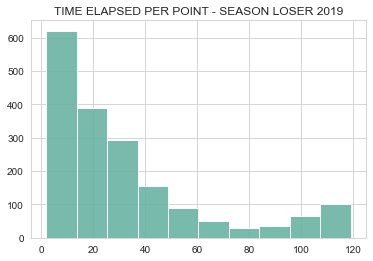

In [91]:
goalvalues = goals_mech['point_elapsed_seconds'].values
plt.hist(goalvalues[goalvalues <120], color="#69b3a2", alpha=0.9)
plt.title('TIME ELAPSED PER POINT - SEASON LOSER 2019')
plt.savefig(f'{parent}/detroit_time')

In [92]:
goalvalues.mean()

385.528626624517

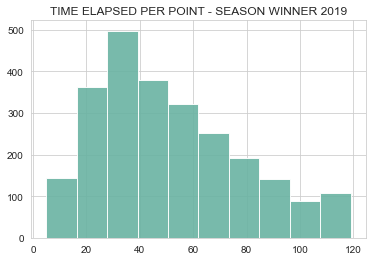

In [93]:
goalvalues = goals_ny['point_elapsed_seconds'].values
plt.hist(goalvalues[goalvalues <120], color="#69b3a2", alpha=0.9)
plt.title('TIME ELAPSED PER POINT - SEASON WINNER 2019')
plt.savefig(f'{parent}/ny_time')

In [94]:
goalvalues.mean()

81.44741126668838

In [416]:
goals.team.unique()

array(['montrealroyal', 'detroitmechanix', 'sandiegogrowlers', 'dcbreeze',
       'austinsol', 'philadelphiaphoenix', 'tampabaycannons',
       'indianapolisalleycats', 'chicagowildfire', 'dallasroughnecks',
       'pittsburghthunderbirds', 'torontorush', 'newyorkempire',
       'atlantahustle', 'seattlecascades', 'minnesotawindchill',
       'raleighflyers', 'madisonradicals', 'sanjosespiders',
       'ottawaoutlaws'], dtype=object)

In [87]:
goals.point_elapsed_seconds.describe()

count    7.000900e+04
mean    -1.265657e+04
std      3.700688e+06
min     -9.778486e+08
25%      2.900000e+01
50%      5.300000e+01
75%      1.050000e+02
max      3.559035e+07
Name: point_elapsed_seconds, dtype: float64

In [88]:
goalvalues[goalvalues<100]

array([21, 23,  7, ..., 42, 63, 27])

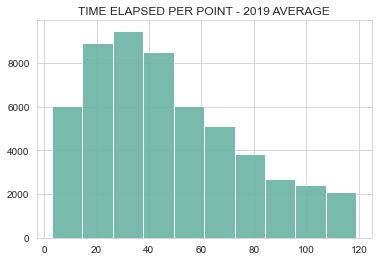

In [95]:
goalvalues = goals['point_elapsed_seconds'].values
plt.hist(goalvalues[(goalvalues <120) & (goalvalues > 2)], color="#69b3a2", alpha=0.9)
plt.title('TIME ELAPSED PER POINT - 2019 AVERAGE')
plt.savefig(f'{parent}/all2019_time')

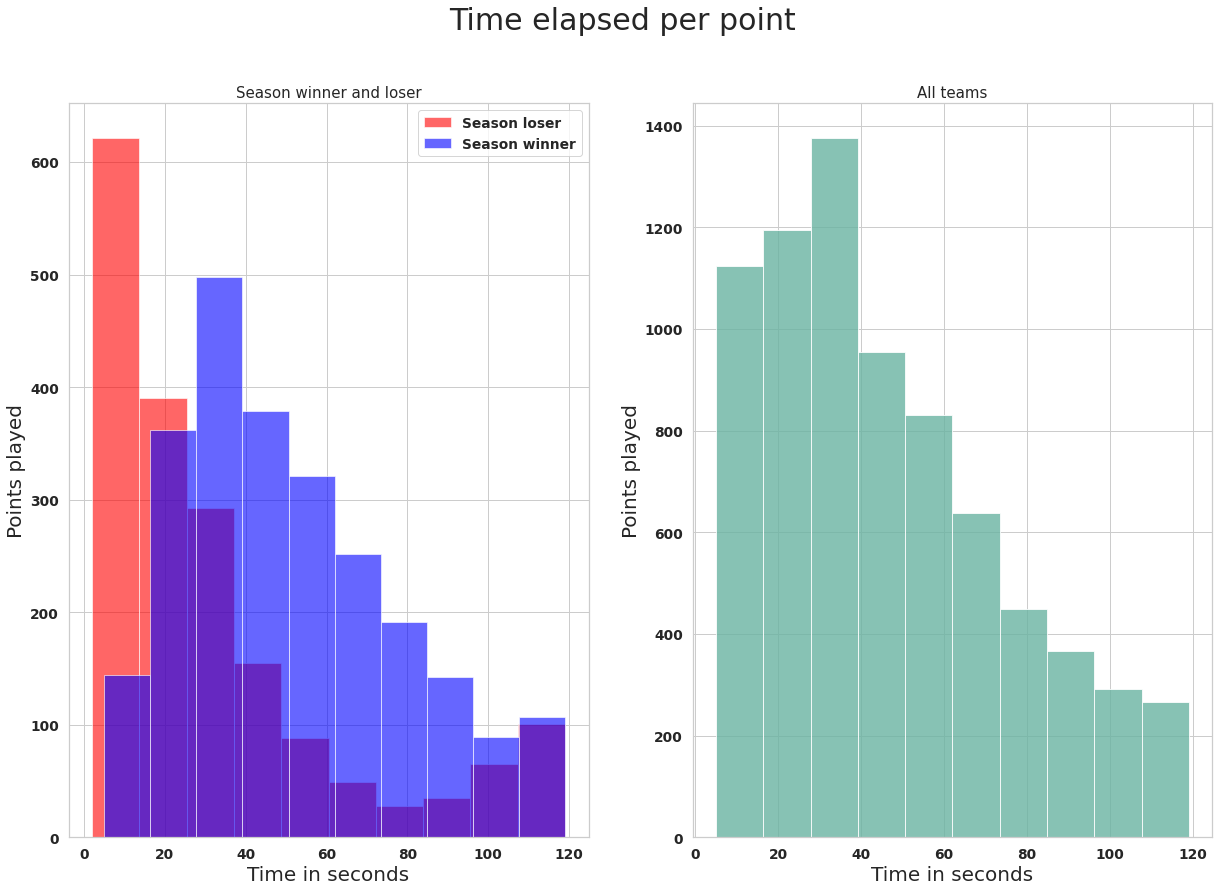

In [414]:
# These plots in one
from matplotlib.patches import Rectangle
font = {'size' : 25, 'weight' : 'normal'}
plt.rc('axes', labelsize=20)
#plt.rc('font', **font)

fig, axs = plt.subplots(1, 2)
fig.set_size_inches(20.5, 13.5)
fig.suptitle('Time elapsed per point')

goalvalues = goals_mech['point_elapsed_seconds'].values
axs[0].hist(goalvalues[goalvalues <120], color="r", alpha=0.6, label="Season loser")
#plt.hist(goalvalues[goalvalues <120], color="g", alpha=0.6)
#axs[0].xlabel("Points played", size=14)
#ax1.ylabel("Time in seconds", size=14)

goalvalues2 = goals_ny['point_elapsed_seconds'].values
#plt.hist(goalvalues2[goalvalues2 <120], color="#69b3a2", alpha=0.6, label="Season winner")
axs[0].hist(goalvalues2[goalvalues2 <120], color="b", alpha=0.6, label="Season winner")
axs[0].title.set_text('Season winner and loser')

axs[0].legend(loc='best')

# Average

goalvalues1 = goals['point_elapsed_seconds'].values
axs[1].hist(goalvalues1[(goalvalues1 <120) & (goalvalues1 > 2)], color="#69b3a2", alpha=0.8, label="Season average")
axs[1].title.set_text('All teams')

for ax in axs.flat:
    ax.set(xlabel='Time in seconds', ylabel='Points played')

#plt.xlabel("Points played", size=14)
#plt.ylabel("Time in seconds", size=14)





#plt.title('Time elapsed per point - season winner and loser')
plt.savefig(f'{parent}/points_overlayed', dpi=300, bbox_inches='tight')

Text(0, 0.5, 'Time in seconds')

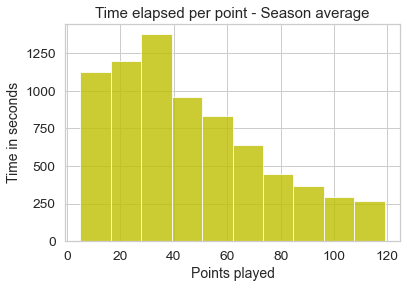

In [ ]:
goal

In [98]:
goalvalues[(goalvalues > 10)].mean()

1397.8463601182314

### Points played by players

In [132]:
# read in summary data
#os.chdir(datapath_clean)

In [149]:
df = pd.read_csv(f'{datapath_clean}/EDA_data.csv', index_col=None)

In [150]:
df.columns

Index(['act_player_id', 'catch', 'drop', 'goalcatch', 'callahan', 'd', 'pull',
       'callahan_throw', 'throw', 'dropped_throw', 'goal', 'miscpenalty',
       'stall', 'throwaway', 'event_type', 'our_score_end_of_point', 'game_id',
       'team_id', 'datetime', 'line', 'elapsed_time_secs',
       'point_elapsed_seconds', 'hang_time_secs', 'team', 'opponent_clean',
       'opponent', 'their_score_end_of_point', 'opponent_id', 'gameover',
       'tournamemnt', 'game_id_str', 'season', 'date_id', 'act_player',
       'throws_all', 'turnover', 'pass_perc', 'catch_perc', 'ranking2019'],
      dtype='object')

In [151]:
df.team.unique()

array(['sanfranciscoflamethrowers', 'vancouverriptide', 'torontorush',
       'dcbreeze', 'raleighflyers', 'detroitmechanix',
       'indianapolisalleycats', 'pittsburghthunderbirds',
       'seattlecascades', 'losangelesaviators', 'cincinnatirevolution',
       'philadelphiaphoenix', 'montrealroyal', 'newyorkempire',
       'charlotteexpress', 'sanjosespiders', 'sandiegogrowlers',
       'jacksonvillecannons', nan, 'nashvillenightwatch',
       'madisonradicals', 'ottawaoutlaws', 'minnesotawindchill',
       'chicagowildfire', 'rochesterdragons', 'sfflamethrowers',
       'dallasroughnecks', 'atlantahustle', 'austinsol',
       'tampabaycannons'], dtype=object)

In [152]:
df.loc[df.team=='newyorkempire']

,act_player_id,catch,drop,goalcatch,callahan,d,pull,callahan_throw,throw,dropped_throw,...,tournamemnt,game_id_str,season,date_id,act_player,throws_all,turnover,pass_perc,catch_perc,ranking2019
252,aulett_m_13,29.0,0.0,2.0,NaN,NaN,NaN,0.0,30.0,1.0,...,AUDL,2015-04-12 12:23_NewYorkEmpire2015-stats.csv,2015.0,1.0,aulett_m,38.0,5.0,0.868421,1.0,1
253,awerbu_b_13,11.0,0.0,0.0,NaN,NaN,NaN,0.0,16.0,0.0,...,AUDL,2015-04-12 12:23_NewYorkEmpire2015-stats.csv,2015.0,1.0,awerbu_b,17.0,1.0,0.941176,1.0,1
254,babbin_j_13,3.0,0.0,1.0,0.0,0.0,4.0,0.0,3.0,0.0,...,AUDL,2015-04-12 12:23_NewYorkEmpire2015-stats.csv,2015.0,1.0,babbin_j,3.0,0.0,1.000000,1.0,1
255,bemis_e_13,3.0,2.0,1.0,NaN,NaN,NaN,0.0,2.0,0.0,...,AUDL,2015-04-12 12:23_NewYorkEmpire2015-stats.csv,2015.0,1.0,bemis_e,3.0,0.0,1.000000,0.6,1
256,brooks_t_13,26.0,0.0,3.0,0.0,1.0,0.0,0.0,21.0,0.0,...,AUDL,2015-04-12 12:23_NewYorkEmpire2015-stats.csv,2015.0,1.0,brooks_t,27.0,1.0,0.962963,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29454,yarter_t_1415,NaN,NaN,NaN,0.0,0.0,3.0,0.0,0.0,0.0,...,AUDL,2019-05-25 16:08_NewYorkEmpire2019-stats.csv,2019.0,212.0,yarter_t,1.0,0.0,1.000000,NaN,1
29572,taylor_s_931,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0,0.0,...,NaN,2017-07-01 19:15_NewYorkEmpire2017-stats.csv,2017.0,135.0,taylor_s,1.0,0.0,1.000000,NaN,1
29579,price_j_1030,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,1.0,...,NaN,2018-04-14 19:10_NewYorkEmpire2018-stats.csv,2018.0,156.0,price_j,1.0,0.0,1.000000,NaN,1
29580,doyle_l_1048,NaN,NaN,NaN,NaN,NaN,NaN,0.0,3.0,0.0,...,NaN,2018-04-21 19:07_NewYorkEmpire2018-stats.csv,2018.0,158.0,doyle_l,3.0,0.0,1.000000,NaN,1


In [ ]:
players = df[act]

In [ ]:
plt.hist(d_cutters["totalpoints"], bins, alpha=.5, 
         color=position_colors["d_cutter"],
         label="Defensive Cutters")

In [ ]:
bins = np.linspace(0, 500, 20)

plt.hist(d_cutters["totalpoints"], bins, alpha=.5, 
         color=position_colors["d_cutter"],
         label="Defensive Cutters")
plt.hist(o_cutters["totalpoints"], bins, alpha=.5,
         color=position_colors["o_cutter"],
         label="Offensive Cutters")
plt.title("Points Played by Cutters")
plt.ylabel("Count")
plt.xlabel("Points Played in 2015 Season")
plt.legend(loc="upper right")

In [156]:
def clean_df(df):
    """Removes rows with improperly formatted data
    
    df: pandas dataframe with throw-by-throw data
    
    returns: pandas df"""
    
    df = df[pd.isnull(df["Player 2"]) == False]
    return df[pd.isnull(df["Player 1"]) == False]

In [160]:
def get_players(df):
    """returns list of all players present in throw-by throw pandas dataframe"""
    players = pd.unique(df.loc[0:, "Player 0": "Player 27"].values.ravel())
    return [player for player in players if not pd.isnull(player)]

In [164]:
def summarize_points(df):
    """Gives point-by-point summaries
    
    df: pandas dataframe throw-by-throw data
    
    returns: pandas dataframe"""
    
    return df.groupby(["Date/Time", "Our Score - End of Point", "Their Score - End of Point"]).last().reset_index() 

In [203]:
def player_summaries(df):
    """Summarize statistics for all players
    
    df: pandas dataframe with throw-by-throw data
    
    returns: pandas dataframe"""
    
     # does not mutate the original
    df = clean_df(df)
    
    players = get_players(df)
    stats = {"team"      : "",
             "goals"     : 0,
             "assists"   : 0,
             "ds"        : 0,
             "throwaways": 0,
             "drops"     : 0,
             "opoints"   : 0,
             "dpoints"   : 0}
    team_stats = {player: dict(stats) for player in players}
    
    # to keep track of the column number
    cols = list(df.columns)
    passer   = cols.index("Passer")
    receiver = cols.index("Receiver")
    p0       = cols.index("Player 0")
    p27      = cols.index("Player 27")
    line     = cols.index("Line")
    
    
    # add goals and assists
    ogoals = df[(df.Action == "Goal") & (df["Event Type"] == "Offense")]
    for row in ogoals.values:
        # we have try/execpt here for unpredictable data impurities
        # eg: "Anonymous" for one of the assists, stat-keeper must
        # have not known who threw it (?) callahan?
        try: team_stats[row[passer]]["assists"] += 1
        except: pass
        try: team_stats[row[receiver]]["goals"]  += 1
        except: pass
        
    # add D's
    ds = df.Defender[df.Action == "D"]
    for player in ds:
        try: team_stats[player]["ds"] += 1
        except: pass
        
        
    # add turnovers and drops
    turns = df[((df.Action == "Throwaway") & (df["Event Type"] == "Offense")) | (df.Action == "Drop") ]
    for row in turns.values:
        if row[8] == "Throwaway":
            try: team_stats[row[passer]]["throwaways"] += 1
            except: pass
        else:
            try: team_stats[row[receiver]]["drops"]     += 1
            except: pass
    
    # add points
    point_summaries = summarize_points(df)
    line = list(point_summaries.columns).index("Line")
    for row in point_summaries.values:
        player_cols = row[p0:p27]
        players = [player for player in player_cols if not pd.isnull(player)]
        if row[line] == "O":
            for player in players:
                team_stats[player]["opoints"] += 1
        else:
            for player in players:
                team_stats[player]["dpoints"] += 1
        
        
    summary = pd.DataFrame.from_dict(team_stats, orient="index").sort_values("goals", ascending=False)
    summary = summary[["team", "goals", "assists", "ds", "throwaways", "drops", "opoints", "dpoints"]]
    summary["totalpoints"] = summary["opoints"] + summary["dpoints"]
    summary["pct_opoints"] = summary["opoints"] / [float(x) for x in summary["totalpoints"]]
    summary["pct_dpoints"] = summary["dpoints"] / [float(x) for x in summary["totalpoints"]]
    summary["pct_goal"]    = summary["goals"]   / [float(x) for x in summary["totalpoints"]]
    summary["pct_assist"]  = summary["assists"] / [float(x) for x in summary["totalpoints"]]
    summary["pct_d"]       = summary["ds"]      / [float(x) for x in summary["totalpoints"]]
    
    return summary

In [307]:
ls

AtlantaHustle2019-stats.csv           OttawaOutlaws2019-stats.csv
AustinSol2019-stats.csv               PhiladelphiaPhoenix2019-stats.csv
ChicagoWildfire2019-stats.csv         PittsburghThunderbirds2019-stats.csv
DCBreeze2019-stats.csv                RaleighFlyers2019-stats.csv
DallasRoughnecks2019-stats.csv        SanDiegoGrowlers2019-stats.csv
DetroitMechanix2019-stats.csv         SanJoseSpiders2019-stats.csv
IndianapolisAlleyCats2019-stats.csv   SeattleCascades2019-stats.csv
MadisonRadicals2019-stats.csv         TampaBayCannons2019-stats.csv
MinnesotaWindChill2019-stats.csv      TorontoRush2019-stats.csv
MontrealRoyal2019-stats.csv           combined.csv
NewYorkEmpire2019-stats.csv


In [308]:
combined2 = pd.read_csv(f'{datapath_clean}/semi_clean_cols.csv', index_col=None)

/Users/ilonanietosvaara/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (26,27,28,29,30,31,32,33,43,46,49,53,54,56) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [304]:
combined = pd.read_csv('combined.csv')

/Users/ilonanietosvaara/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (30,31,32,33) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [306]:
combined.columns

Index(['Unnamed: 0', 'Date/Time', 'Tournamemnt', 'Opponent',
       'Point Elapsed Seconds', 'Line', 'Our Score - End of Point',
       'Their Score - End of Point', 'Event Type', 'Action', 'Passer',
       'Receiver', 'Defender', 'Hang Time (secs)', 'Player 0', 'Player 1',
       'Player 2', 'Player 3', 'Player 4', 'Player 5', 'Player 6', 'Player 7',
       'Player 8', 'Player 9', 'Player 10', 'Player 11', 'Player 12',
       'Player 13', 'Player 14', 'Player 15', 'Player 16', 'Player 17',
       'Player 18', 'Player 19', 'Player 20', 'Player 21', 'Player 22',
       'Player 23', 'Player 24', 'Player 25', 'Player 26', 'Player 27',
       'Elapsed Time (secs)', 'Begin Area', 'Begin X', 'Begin Y', 'End Area',
       'End X', 'End Y', 'Distance Unit of Measure', 'Absolute Distance',
       'Lateral Distance', 'Toward Our Goal Distance', 'team', 'Unnamed: 0.1'],
      dtype='object')

In [332]:
summary = player_summaries(combined)

In [333]:
summary

,team,goals,assists,ds,throwaways,drops,opoints,dpoints,totalpoints,pct_opoints,pct_dpoints,pct_goal,pct_assist,pct_d
Rowan M,,134,102,10,0,8,250,82,332,0.753012,0.246988,0.403614,0.307229,0.030120
Sheppa M,,122,136,18,0,12,221,86,307,0.719870,0.280130,0.397394,0.442997,0.058632
Jagt B,,112,112,28,0,14,224,72,296,0.756757,0.243243,0.378378,0.378378,0.094595
E Jaime,,104,24,8,0,4,149,52,201,0.741294,0.258706,0.517413,0.119403,0.039801
Jeremy,,102,58,38,0,14,304,155,459,0.662309,0.337691,0.222222,0.126362,0.082789
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Ouelle J,,0,0,0,0,0,1,18,19,0.052632,0.947368,0.000000,0.000000,0.000000
Alarco A,,0,0,0,0,0,3,26,29,0.103448,0.896552,0.000000,0.000000,0.000000
Grappo Z,,0,0,0,0,0,0,4,4,0.000000,1.000000,0.000000,0.000000,0.000000
To N,,0,2,0,0,0,0,12,12,0.000000,1.000000,0.000000,0.166667,0.000000


In [259]:
all_players = player_summaries(combined)

In [260]:
all_players

,team,goals,assists,ds,throwaways,drops,opoints,dpoints,totalpoints,pct_opoints,pct_dpoints,pct_goal,pct_assist,pct_d
Rowan M,,134,102,10,0,8,250,82,332,0.753012,0.246988,0.403614,0.307229,0.030120
Sheppa M,,122,136,18,0,12,221,86,307,0.719870,0.280130,0.397394,0.442997,0.058632
Jagt B,,112,112,28,0,14,224,72,296,0.756757,0.243243,0.378378,0.378378,0.094595
E Jaime,,104,24,8,0,4,149,52,201,0.741294,0.258706,0.517413,0.119403,0.039801
Jeremy,,102,58,38,0,14,304,155,459,0.662309,0.337691,0.222222,0.126362,0.082789
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Ouelle J,,0,0,0,0,0,1,18,19,0.052632,0.947368,0.000000,0.000000,0.000000
Alarco A,,0,0,0,0,0,3,26,29,0.103448,0.896552,0.000000,0.000000,0.000000
Grappo Z,,0,0,0,0,0,0,4,4,0.000000,1.000000,0.000000,0.000000,0.000000
To N,,0,2,0,0,0,0,12,12,0.000000,1.000000,0.000000,0.166667,0.000000


In [263]:
all_players["goal_percentile"] = [percentileofscore(all_players["pct_goal"], x) / 100.0 for x in all_players["pct_goal"]]
all_players["assist_percentile"] = [percentileofscore(all_players["pct_assist"], x) / 100.0 for x in all_players["pct_assist"]]
cluster_cols = all_players[["pct_opoints", "goal_percentile", "assist_percentile"]]
cluster_cols = all_players[["pct_opoints", "goal_percentile", "assist_percentile"]]

In [334]:
cluster_cols.values

array([[0.75301205, 0.98206278, 0.94469357],
       [0.71986971, 0.97907324, 0.98953662],
       [0.75675676, 0.97608371, 0.97608371],
       ...,
       [0.        , 0.10089686, 0.11509716],
       [0.        , 0.10089686, 0.79895366],
       [0.        , 0.10089686, 0.11509716]])

In [336]:
all_players.team

Rowan M      
Sheppa M     
Jagt B       
E Jaime      
Jeremy       
           ..
Ouelle J     
Alarco A     
Grappo Z     
To N         
Habib        
Name: team, Length: 669, dtype: object

### Cluster

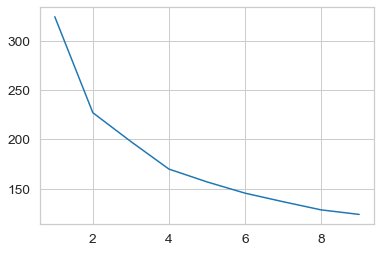

In [265]:
num_clusters = range(1, 10)
models = [KMeans(n_clusters = x) for x in num_clusters]
def score_from_model(model):
    predicted = model.fit_predict(cluster_cols.values)
    centroids = [model.cluster_centers_[x] for x in predicted]
    dist_sum = 0
    for i in range(0, len(predicted)):
        dist_sum += euclidean(cluster_cols.values[i], centroids[i])
    return dist_sum
scores = [score_from_model(model) for model in models]
scores

plt.plot(num_clusters, scores)
plt.savefig(f'{parent}/elbow', dpi=300, bbox_inches='tight')

In [266]:
model = KMeans(n_clusters=2).fit(cluster_cols.values)
all_players["cluster"] = model.labels_
all_players.groupby("cluster").count().iloc[0:, 0]

cluster
0    259
1    410
Name: team, dtype: int64

In [267]:
all_players.groupby("cluster").mean()

,goals,assists,ds,throwaways,drops,opoints,dpoints,totalpoints,pct_opoints,pct_dpoints,pct_goal,pct_assist,pct_d,goal_percentile,assist_percentile
cluster,,,,,,,,,,,,,,,
0,28.254826,29.297297,8.023166,0.0,3.938224,113.285714,40.092664,153.378378,0.737748,0.262252,0.179003,0.174133,0.054554,0.706310,0.709498
1,6.107317,5.434146,6.721951,0.0,1.331707,17.121951,64.182927,81.304878,0.180881,0.819119,0.063458,0.054312,0.074502,0.370892,0.368878


In [268]:
all_players.loc[all_players['cluster']==0, 'cluster'] = 'o_player'
all_players.loc[all_players['cluster']==1, 'cluster'] = 'd_player'
#all_players.rename(index={1:'d_player'},inplace=True)

In [269]:
all_players.cluster

Rowan M     o_player
Sheppa M    o_player
Jagt B      o_player
E Jaime     o_player
Jeremy      o_player
              ...   
Ouelle J    d_player
Alarco A    d_player
Grappo Z    d_player
To N        d_player
Habib       d_player
Name: cluster, Length: 669, dtype: object

In [270]:
all_players

,team,goals,assists,ds,throwaways,drops,opoints,dpoints,totalpoints,pct_opoints,pct_dpoints,pct_goal,pct_assist,pct_d,goal_percentile,assist_percentile,cluster
Rowan M,,134,102,10,0,8,250,82,332,0.753012,0.246988,0.403614,0.307229,0.030120,0.982063,0.944694,o_player
Sheppa M,,122,136,18,0,12,221,86,307,0.719870,0.280130,0.397394,0.442997,0.058632,0.979073,0.989537,o_player
Jagt B,,112,112,28,0,14,224,72,296,0.756757,0.243243,0.378378,0.378378,0.094595,0.976084,0.976084,o_player
E Jaime,,104,24,8,0,4,149,52,201,0.741294,0.258706,0.517413,0.119403,0.039801,0.997010,0.669656,o_player
Jeremy,,102,58,38,0,14,304,155,459,0.662309,0.337691,0.222222,0.126362,0.082789,0.861734,0.689088,o_player
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Ouelle J,,0,0,0,0,0,1,18,19,0.052632,0.947368,0.000000,0.000000,0.000000,0.100897,0.115097,d_player
Alarco A,,0,0,0,0,0,3,26,29,0.103448,0.896552,0.000000,0.000000,0.000000,0.100897,0.115097,d_player
Grappo Z,,0,0,0,0,0,0,4,4,0.000000,1.000000,0.000000,0.000000,0.000000,0.100897,0.115097,d_player
To N,,0,2,0,0,0,0,12,12,0.000000,1.000000,0.000000,0.166667,0.000000,0.100897,0.798954,d_player


In [271]:
# defining clusters in plaintext
all_players.cluster[all_players.cluster == 1] = "off_player"
all_players.cluster[all_players.cluster == 0] = "d_player"

<ipython-input-271-3b5f691cb91d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_players.cluster[all_players.cluster == 1] = "off_player"
<ipython-input-271-3b5f691cb91d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_players.cluster[all_players.cluster == 0] = "d_player"


In [272]:
cluster_summary = all_players.groupby("cluster").mean()

In [273]:
cluster_summary

,goals,assists,ds,throwaways,drops,opoints,dpoints,totalpoints,pct_opoints,pct_dpoints,pct_goal,pct_assist,pct_d,goal_percentile,assist_percentile
cluster,,,,,,,,,,,,,,,
d_player,6.107317,5.434146,6.721951,0.0,1.331707,17.121951,64.182927,81.304878,0.180881,0.819119,0.063458,0.054312,0.074502,0.370892,0.368878
o_player,28.254826,29.297297,8.023166,0.0,3.938224,113.285714,40.092664,153.378378,0.737748,0.262252,0.179003,0.174133,0.054554,0.706310,0.709498


In [ ]:
ax = plt.gca()
sns.barplot(list(cluster_summary.index), cluster_summary.pct_opoints,
            palette=position_colors, ax=ax)
ax.set_title("Percentage Points Played on Offense")

In [262]:
all_players.to_csv(f"{datapath_clean}/cluster_players.csv")

In [276]:
blues = sns.color_palette("Greens")
reds  = sns.color_palette("Blues")

position_colors = {"d_player" : blues[4],
                   "o_player" : reds[2]}
position_order = ["o_player",
                  "d_player"]

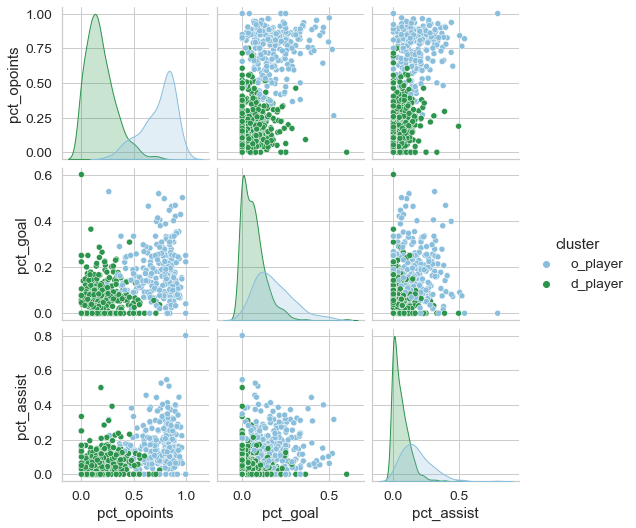

In [281]:
sns.set_context("notebook", font_scale=1.25)
sns.pairplot(all_players, vars=["pct_opoints", "pct_goal", "pct_assist"],
             hue="cluster", hue_order=position_order, palette=position_colors, diag_kind="hist")
plt.savefig(f'{parent}/clusterplot', dpi=300, bbox_inches='tight')


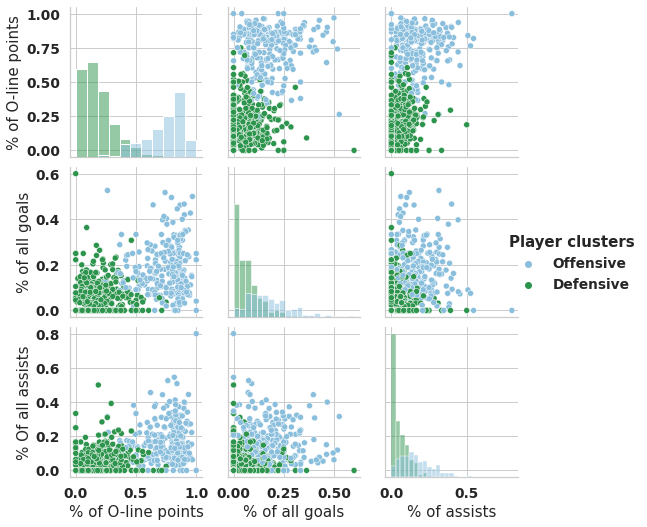

In [429]:
sns.set_context("notebook", font_scale=1.25)
g = sns.pairplot(all_players, vars=["pct_opoints", "pct_goal", "pct_assist"],
             hue="cluster", hue_order=position_order, palette=position_colors, diag_kind="hist")

replacements = {'pct_opoints': '% of O-line points', 
                'pct_goal': '% of all goals',
                'pct_assist': '% of assists'
               }

for i in range(2):
    for j in range(2):
        xlabel = g.axes[i][j].get_xlabel()
        ylabel = g.axes[i][j].get_ylabel()
        if xlabel in replacements.keys():
            g.axes[i][j].set_xlabel(replacements[xlabel])
        if ylabel in replacements.keys():
            g.axes[i][j].set_ylabel(replacements[ylabel])

g.axes[2][0].set_ylabel('% Of all assists')
g.axes[2][0].set_xlabel('% of O-line points')
g.axes[2][1].set_xlabel('% of all goals')
g.axes[2][2].set_xlabel('% of assists')


# title
new_title = 'Player clusters'
g._legend.set_title(new_title)
# replace labels
new_labels = ['Offensive', 'Defensive']
for t, l in zip(g._legend.texts, new_labels):
    t.set_text(l)



plt.savefig(f'{parent}/clusterplot_new', dpi=300, bbox_inches='tight')



In [423]:
g.axes[0][1]

<AxesSubplot:>

<AxesSubplot:xlabel='pct_opoints', ylabel='pct_assist'>

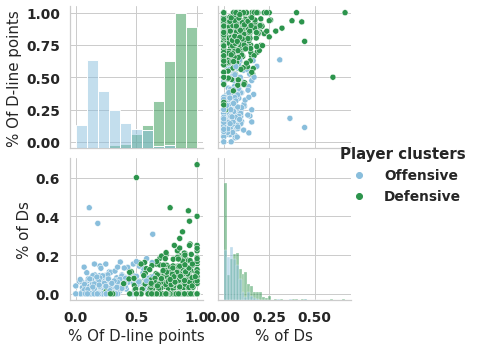

In [433]:
g = sns.pairplot(all_players, vars=["pct_dpoints", "pct_d"],
             hue="cluster", hue_order=position_order, palette=position_colors, diag_kind="hist")



# title
new_title = 'Player clusters'
g._legend.set_title(new_title)
# replace labels
new_labels = ['Offensive', 'Defensive']
for t, l in zip(g._legend.texts, new_labels):
    t.set_text(l)

g.axes[0][0].set_ylabel('% Of D-line points')
g.axes[1][0].set_ylabel('% of Ds')
g.axes[1][0].set_xlabel('% Of D-line points')
g.axes[1][1].set_xlabel('% of Ds')

plt.savefig(f'{parent}/clusterplot3', dpi=300, bbox_inches='tight')

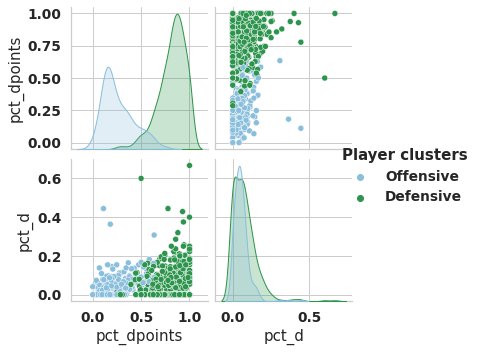

In [431]:
g = sns.pairplot(all_players, vars=["pct_dpoints", "pct_d"],
             hue="cluster", hue_order=position_order, palette=position_colors)



# title
new_title = 'Player clusters'
g._legend.set_title(new_title)
# replace labels
new_labels = ['Offensive', 'Defensive']
for t, l in zip(g._legend.texts, new_labels):
    t.set_text(l)


plt.savefig(f'{parent}/clusterplot3', dpi=300, bbox_inches='tight')

In [ ]:
g.axes[0][0].set_ylabel('% Of D-line points')
g.axes[1][0].set_ylabel('% of Ds')
g.axes[1][0].set_xlabel('% Of D-line points')
g.axes[1][1].set_xlabel('% of Ds')


/Users/ilonanietosvaara/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Percentage Points Played on Offense')

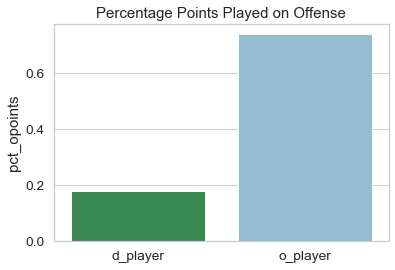

In [282]:
ax = plt.gca()
sns.barplot(list(cluster_summary.index), cluster_summary.pct_opoints,
            palette=position_colors, ax=ax)
ax.set_title("Percentage Points Played on Offense")

/Users/ilonanietosvaara/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Goals Scored per Point Played')

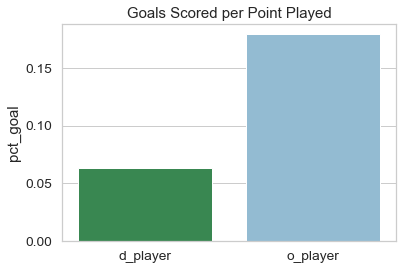

In [283]:
ax = plt.gca()
sns.barplot(list(cluster_summary.index), cluster_summary.pct_goal,
            palette=position_colors, ax=ax)
ax.set_title("Goals Scored per Point Played")

/Users/ilonanietosvaara/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Assists per Point Played')

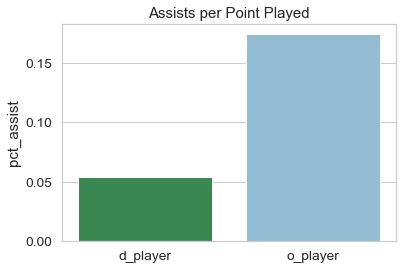

In [284]:
ax = plt.gca()
sns.barplot(list(cluster_summary.index), cluster_summary.pct_assist,
            palette=position_colors, ax=ax)
ax.set_title("Assists per Point Played")

In [290]:
o_players = all_players[all_players.cluster == "o_player"]
d_players = all_players[all_players.cluster == "d_player"]

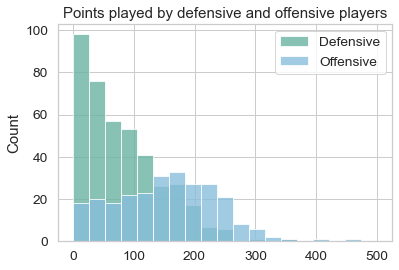

In [297]:
bins = np.linspace(0, 500, 20)

plt.hist(d_players["totalpoints"], bins, alpha=.8, 
         color="#69b3a2",
         label="Defensive")
plt.hist(o_players["totalpoints"], bins, alpha=.8,
         color=position_colors["o_player"],
         label="Offensive")
plt.title("Points played by defensive and offensive players")
plt.ylabel("Count")
plt.legend(loc="upper right")
plt.savefig(f'{parent}/points_played', dpi=300, bbox_inches='tight')

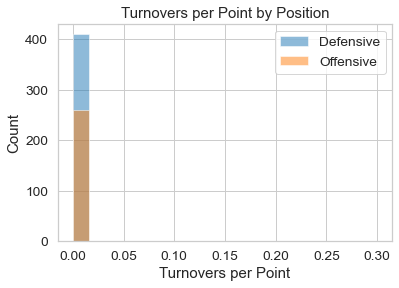

In [299]:
bins = np.linspace(0, .3, 20)

plt.hist(d_players["throwaways"]/d_players["totalpoints"], bins, alpha=.5,
         label="Defensive")
plt.hist(o_players["throwaways"]/o_players["totalpoints"], bins, alpha=.5,
         label="Offensive")
plt.title("Turnovers per Point by Position")
plt.ylabel("Count")
plt.xlabel("Turnovers per Point")
plt.legend(loc="upper right")

In [303]:
d_players

,team,goals,assists,ds,throwaways,drops,opoints,dpoints,totalpoints,pct_opoints,pct_dpoints,pct_goal,pct_assist,pct_d,goal_percentile,assist_percentile,cluster
Babbit J,,58,10,38,0,2,83,165,248,0.334677,0.665323,0.233871,0.040323,0.153226,0.875934,0.354260,d_player
Drew,,50,4,48,0,4,35,210,245,0.142857,0.857143,0.204082,0.016327,0.195918,0.834828,0.243647,d_player
Horty,,36,8,12,0,4,55,127,182,0.302198,0.697802,0.197802,0.043956,0.065934,0.826607,0.370703,d_player
Worthing,,36,6,18,0,2,52,127,179,0.290503,0.709497,0.201117,0.033520,0.100559,0.831091,0.319133,d_player
Graber C,,32,6,2,0,4,55,124,179,0.307263,0.692737,0.178771,0.033520,0.011173,0.798206,0.319133,d_player
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Ouelle J,,0,0,0,0,0,1,18,19,0.052632,0.947368,0.000000,0.000000,0.000000,0.100897,0.115097,d_player
Alarco A,,0,0,0,0,0,3,26,29,0.103448,0.896552,0.000000,0.000000,0.000000,0.100897,0.115097,d_player
Grappo Z,,0,0,0,0,0,0,4,4,0.000000,1.000000,0.000000,0.000000,0.000000,0.100897,0.115097,d_player
To N,,0,2,0,0,0,0,12,12,0.000000,1.000000,0.000000,0.166667,0.000000,0.100897,0.798954,d_player
